In [ ]:
# Priyal
# Dataset -CM1
# without balancing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Visualization**

In [2]:
import pandas as pd

# Load cm1 dataset
cm1_data = pd.read_csv("/content/drive/MyDrive/CAPSTONE/cm1.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(cm1_data.head())



First few rows of the dataset:
    loc  v(g)  ev(g)  iv(g)     n       v     l      d      i        e  ...  \
0   1.1   1.4    1.4    1.4   1.3    1.30  1.30   1.30   1.30     1.30  ...   
1   1.0   1.0    1.0    1.0   1.0    1.00  1.00   1.00   1.00     1.00  ...   
2  24.0   5.0    1.0    3.0  63.0  309.13  0.11   9.50  32.54  2936.77  ...   
3  20.0   4.0    4.0    2.0  47.0  215.49  0.06  16.00  13.47  3447.89  ...   
4  24.0   6.0    6.0    2.0  72.0  346.13  0.06  17.33  19.97  5999.58  ...   

   lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0       2          2        2                  2      1.2        1.2   
1       1          1        1                  1      1.0        1.0   
2       1          0        6                  0     15.0       15.0   
3       0          0        3                  0     16.0        8.0   
4       0          0        3                  0     16.0       12.0   

   total_Op  total_Opnd  branchCount  defects  
0       1.2  

In [3]:
# Display information about the dataset
print("\nInformation about the dataset:")
print(cm1_data.info())



Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                498 non-null    float64
 1   v(g)               498 non-null    float64
 2   ev(g)              498 non-null    float64
 3   iv(g)              498 non-null    float64
 4   n                  498 non-null    float64
 5   v                  498 non-null    float64
 6   l                  498 non-null    float64
 7   d                  498 non-null    float64
 8   i                  498 non-null    float64
 9   e                  498 non-null    float64
 10  b                  498 non-null    float64
 11  t                  498 non-null    float64
 12  lOCode             498 non-null    int64  
 13  lOComment          498 non-null    int64  
 14  lOBlank            498 non-null    int64  
 15  locCodeAndComment  498 non-null    int64  

In [4]:
# Summary statistics of numerical attributes
print("\nSummary statistics of numerical attributes:")
print(cm1_data.describe())



Summary statistics of numerical attributes:
              loc        v(g)       ev(g)       iv(g)            n  \
count  498.000000  498.000000  498.000000  498.000000   498.000000   
mean    29.644779    5.382329    2.490763    3.528916   143.956426   
std     42.753572    8.347359    3.658847    5.464398   221.049888   
min      1.000000    1.000000    1.000000    1.000000     1.000000   
25%      8.000000    1.000000    1.000000    1.000000    25.000000   
50%     17.000000    3.000000    1.000000    2.000000    67.500000   
75%     31.000000    6.000000    1.000000    4.000000   151.750000   
max    423.000000   96.000000   30.000000   63.000000  2075.000000   

                  v           l           d           i             e  ...  \
count    498.000000  498.000000  498.000000  498.000000  4.980000e+02  ...   
mean     900.175823    0.146325   15.829378   38.455361  3.488493e+04  ...   
std     1690.814334    0.159337   15.330960   36.996297  1.341647e+05  ...   
min        0

In [5]:
# Class distribution
print("\nClass distribution:")
print(cm1_data['defects'].value_counts())



Class distribution:
False    449
True      49
Name: defects, dtype: int64


In [6]:
# Missing values
print("\nMissing values:")
print(cm1_data.isnull().sum())


Missing values:
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64


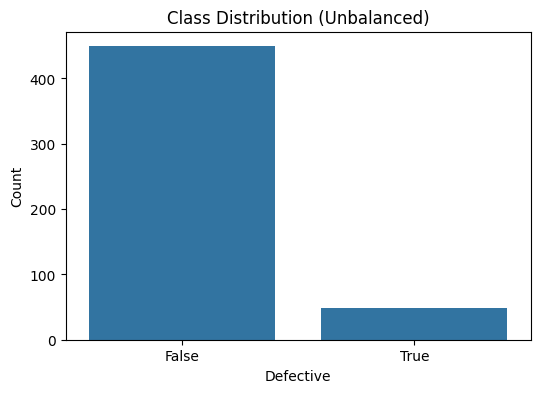

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=cm1_data, x='defects')
plt.title('Class Distribution (Unbalanced)')
plt.xlabel('Defective')
plt.ylabel('Count')
plt.show()




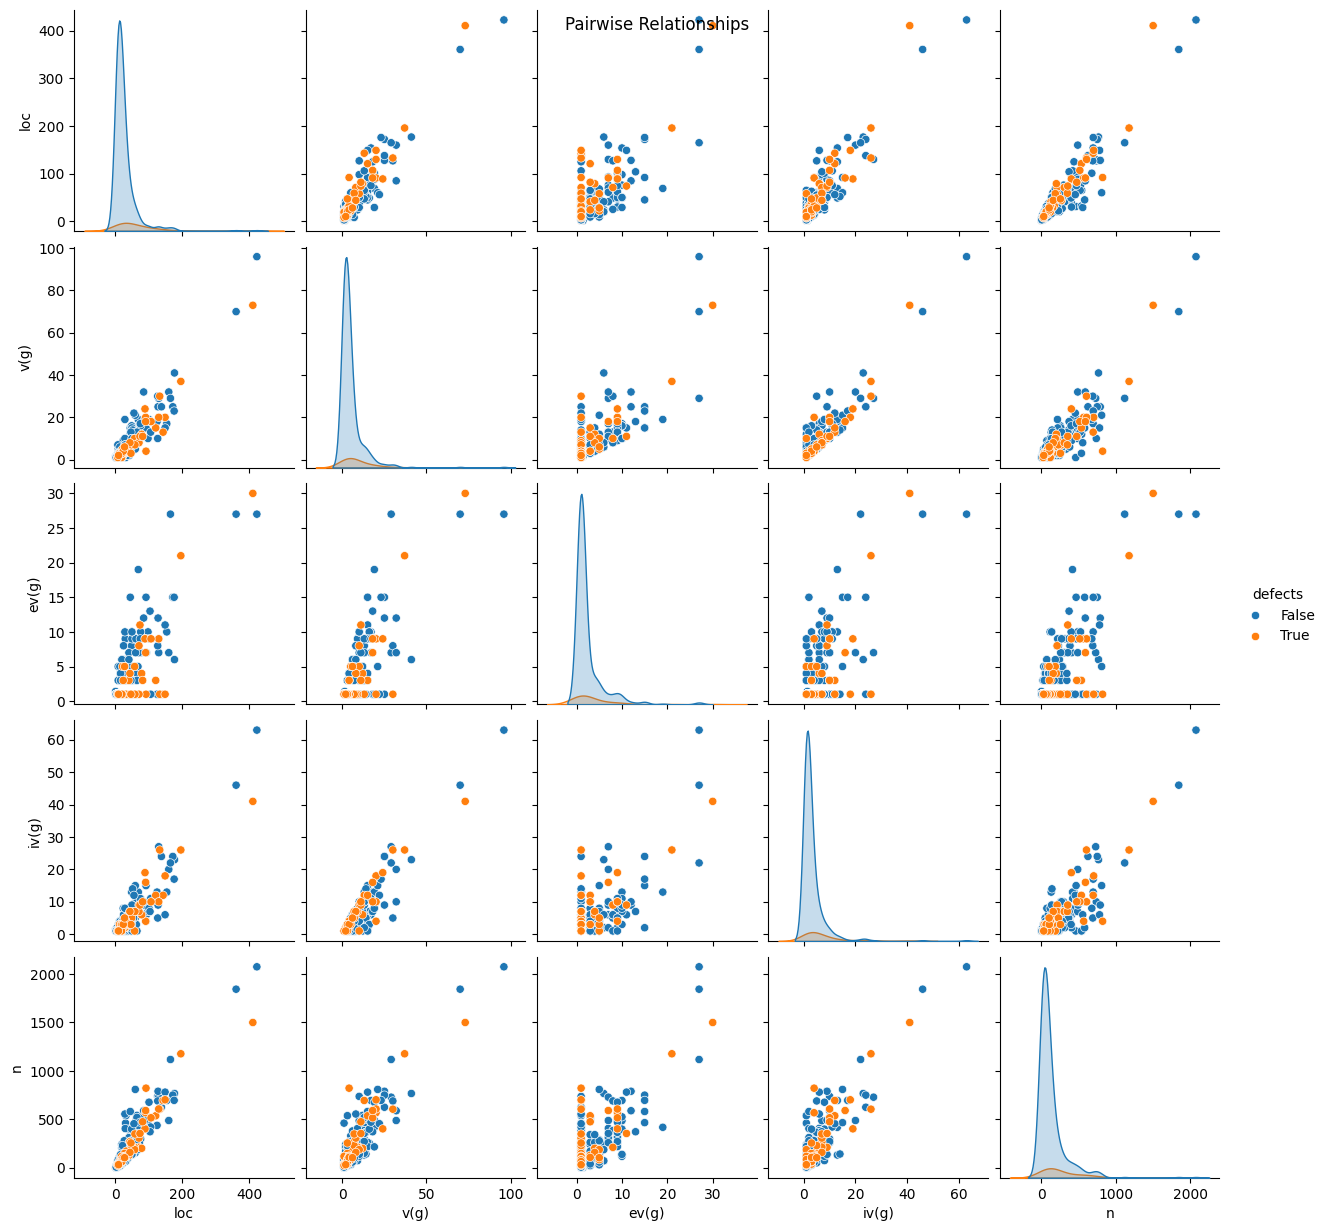

In [8]:
# Pairwise Relationships
sns.pairplot(cm1_data[['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'defects']], hue='defects')
plt.suptitle('Pairwise Relationships')
plt.show()



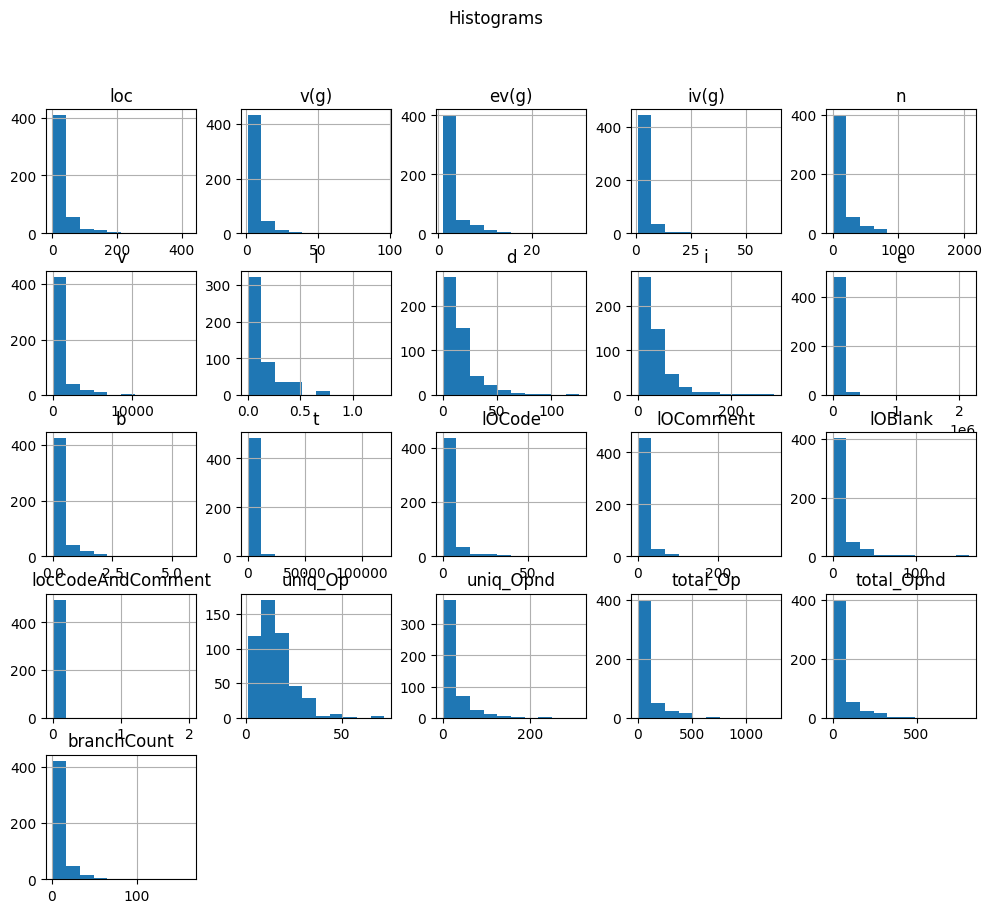

In [9]:
# Histograms
cm1_data.hist(figsize=(12, 10))
plt.suptitle('Histograms')
plt.show()


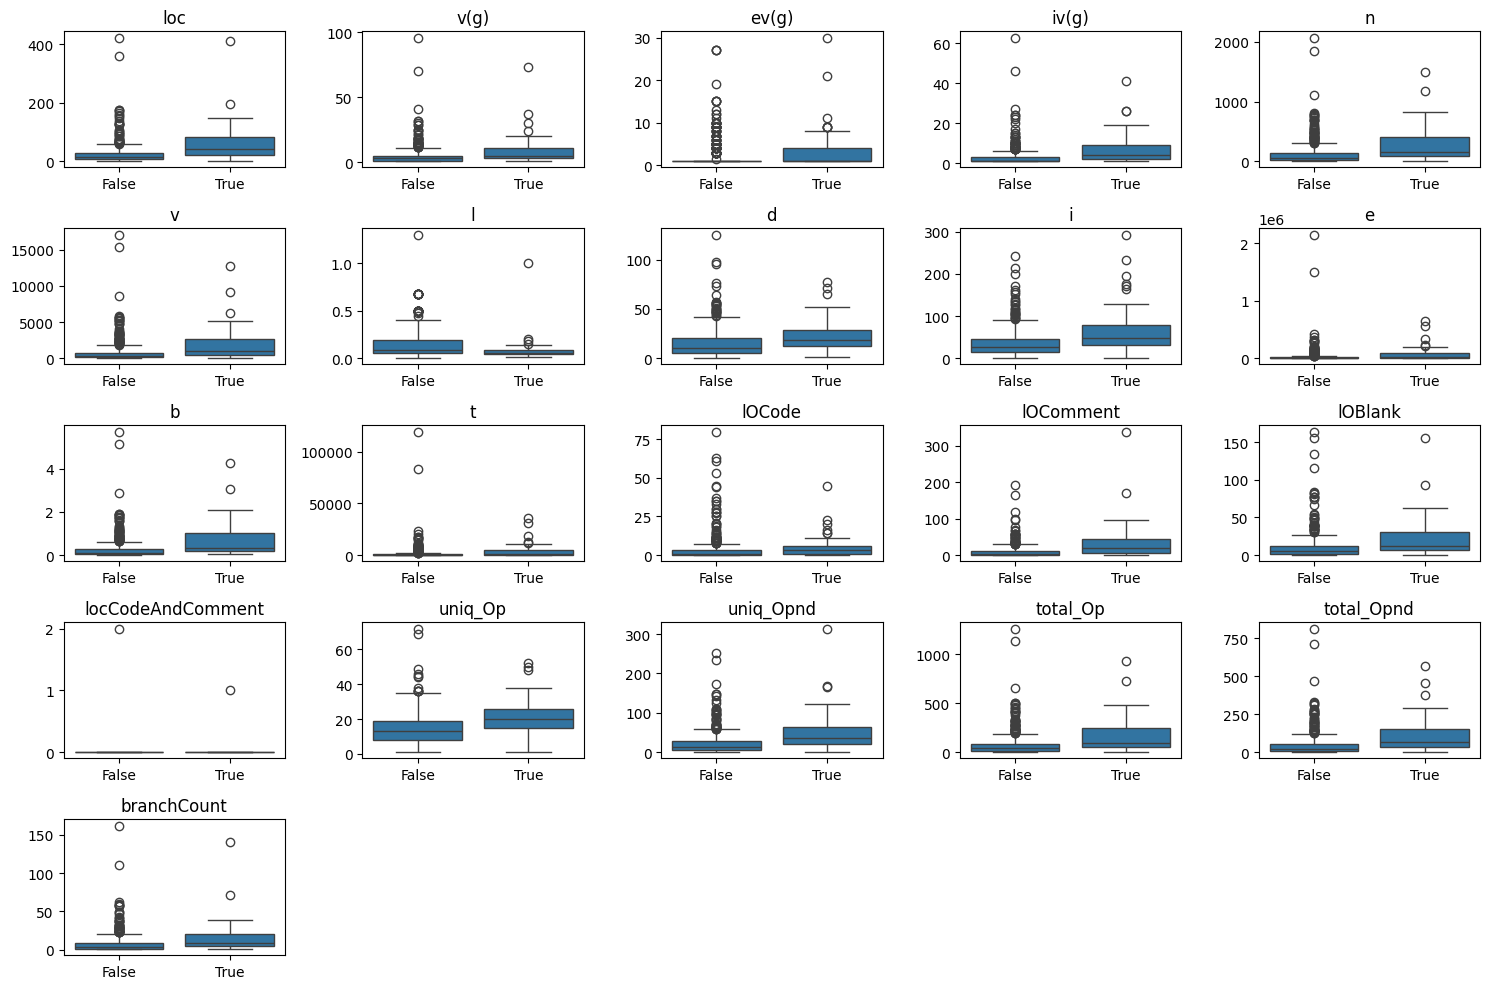

In [10]:
# Visualize box plots for all attributes
plt.figure(figsize=(15, 10))
for i, column in enumerate(cm1_data.columns[:-1]):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x='defects', y=column, data=cm1_data)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

# **Random Forest Classifier**

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Preprocess data
X = cm1_data.drop(columns=["defects"])
y = cm1_data["defects"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestClassifier on the original unbalanced dataset
rf_classifier_original = RandomForestClassifier(random_state=42)
rf_classifier_original.fit(X_train, y_train)

# Predict on the test set
y_pred_original = rf_classifier_original.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_original)
print("Random Classifier Accuracy on original unbalanced data:", accuracy_rf)

# Calculate precision
precision_rf = precision_score(y_test, y_pred_original,average='weighted')

# Calculate recall
recall_rf = recall_score(y_test, y_pred_original,average='weighted')

# Print precision and recall
print("Precision:", precision_rf)
print("Recall:", recall_rf)

# Generate classification report
classification_report_rf = classification_report(y_test, y_pred_original)
print("\nClassification Report:\n", classification_report_rf)


Random Classifier Accuracy on original unbalanced data: 0.86
Precision: 0.7722448979591836
Recall: 0.86

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.98      0.92        88
        True       0.00      0.00      0.00        12

    accuracy                           0.86       100
   macro avg       0.44      0.49      0.46       100
weighted avg       0.77      0.86      0.81       100



# **K-means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Accuracy without balancing: 0.10240963855421686
Precision: 0.9113267586474931
Recall: 0.10240963855421686


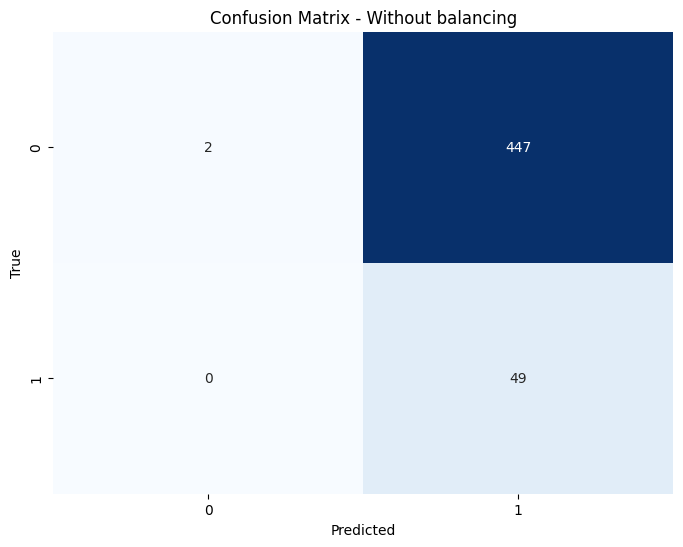

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.00      0.01       449
        True       0.10      1.00      0.18        49

    accuracy                           0.10       498
   macro avg       0.55      0.50      0.09       498
weighted avg       0.91      0.10      0.03       498



In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Separate features and target variable
X_original = cm1_data.drop(columns=["defects"])
y_original = cm1_data["defects"]

# Train KMeans model
kmeans_original = KMeans(n_clusters=2, random_state=42)
kmeans_original.fit(X_original)

# Predict clusters
y_pred_original = kmeans_original.labels_

# Calculate accuracy
accuracy_kmeans = accuracy_score(y_original, y_pred_original)
print("K-means Accuracy without balancing:", accuracy_kmeans)

# Calculate precision
precision_kmeans = precision_score(y_original, y_pred_original, average='weighted')

# Calculate recall
recall_kmeans = recall_score(y_original, y_pred_original, average='weighted')

# Print precision and recall
print("Precision:", precision_kmeans)
print("Recall:", recall_kmeans)


# Create confusion matrix
cm_original = confusion_matrix(y_original, y_pred_original)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_original, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Without balancing")
plt.show()

# Generate classification report
print("Classification Report:")
print(classification_report(y_original, y_pred_original))


# **SVM**

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


# Split the data into features and target variable
X = cm1_data.drop(columns=["defects"])
y = cm1_data["defects"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM on the unbalanced dataset
svm_unbalanced = SVC(kernel='linear')
svm_unbalanced.fit(X_train, y_train)

# Predict on the test set
y_pred_unbalanced = svm_unbalanced.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_unbalanced)
print("SVM Accuracy on unbalanced data:", accuracy_svm)

# Calculate precision
precision_svm = precision_score(y_test, y_pred_unbalanced, average='weighted')
print("SVM Precision:", precision_svm)

# Calculate recall
recall_svm = recall_score(y_test, y_pred_unbalanced,average='weighted')
print("SVM Recall:", recall_svm)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_unbalanced))


SVM Accuracy on unbalanced data: 0.87
SVM Precision: 0.8353684210526316
SVM Recall: 0.87
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.97      0.93        88
        True       0.40      0.17      0.24        12

    accuracy                           0.87       100
   macro avg       0.65      0.57      0.58       100
weighted avg       0.84      0.87      0.85       100



# **Logistic Regression**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Split the data into features and target variable
X = cm1_data.drop(columns=["defects"])
y = cm1_data["defects"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression on the unbalanced dataset
lr_unbalanced = LogisticRegression(random_state=42)
lr_unbalanced.fit(X_train, y_train)

# Predict on the test set
y_pred_unbalanced = lr_unbalanced.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_unbalanced)
print("Logistic Regression Accuracy on unbalanced data:", accuracy_lr)

# Calculate precision
precision_lr = precision_score(y_test, y_pred_unbalanced, average='weighted')
print("Logistic Regression Precision:", precision_lr)

# Calculate recall
recall_lr = recall_score(y_test, y_pred_unbalanced, average='weighted')
print("Logistic Regression Recall:", recall_lr)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_unbalanced))


Logistic Regression Accuracy on unbalanced data: 0.88
Logistic Regression Precision: 0.7744
Logistic Regression Recall: 0.88
Classification Report:
              precision    recall  f1-score   support

       False       0.88      1.00      0.94        88
        True       0.00      0.00      0.00        12

    accuracy                           0.88       100
   macro avg       0.44      0.50      0.47       100
weighted avg       0.77      0.88      0.82       100



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

# **Decision Trees**

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Split the data into features and target variable
X = cm1_data.drop(columns=["defects"])
y = cm1_data["defects"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree on the unbalanced dataset
dt_unbalanced = DecisionTreeClassifier(random_state=42)
dt_unbalanced.fit(X_train, y_train)

# Predict on the test set
y_pred_unbalanced = dt_unbalanced.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_unbalanced,)
print("Decision Trees Accuracy on unbalanced data:", accuracy_dt)

# Calculate precision and recall
precision_dt = precision_score(y_test, y_pred_unbalanced,average='weighted')
recall_dt = recall_score(y_test, y_pred_unbalanced,average='weighted')

print("Precision:", precision_dt)
print("Recall:", recall_dt)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_unbalanced))


Decision Trees Accuracy on unbalanced data: 0.86
Precision: 0.8497777777777777
Recall: 0.86

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.93      0.92        88
        True       0.40      0.33      0.36        12

    accuracy                           0.86       100
   macro avg       0.66      0.63      0.64       100
weighted avg       0.85      0.86      0.85       100



# **Gradient Boosing**

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


# Split the data into features and target variable
X = cm1_data.drop(columns=["defects"])
y = cm1_data["defects"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting on the unbalanced dataset
gb_unbalanced = GradientBoostingClassifier(random_state=42)
gb_unbalanced.fit(X_train, y_train)

# Predict on the test set
y_pred_unbalanced = gb_unbalanced.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_unbalanced)
print("Gradient Boosting Accuracy on unbalanced data:", accuracy_gb)

# Calculate precision
precision_gb = precision_score(y_test, y_pred_unbalanced,average='weighted')
print("Gradient Boosting Precision:", precision_gb)

# Calculate recall
recall_gb = recall_score(y_test, y_pred_unbalanced,average='weighted')
print("Gradient Boosting Recall:", recall_gb)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_unbalanced))


Gradient Boosting Accuracy on unbalanced data: 0.88
Gradient Boosting Precision: 0.8557446808510639
Gradient Boosting Recall: 0.88
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.97      0.93        88
        True       0.50      0.25      0.33        12

    accuracy                           0.88       100
   macro avg       0.70      0.61      0.63       100
weighted avg       0.86      0.88      0.86       100



# **Comparison Between models**

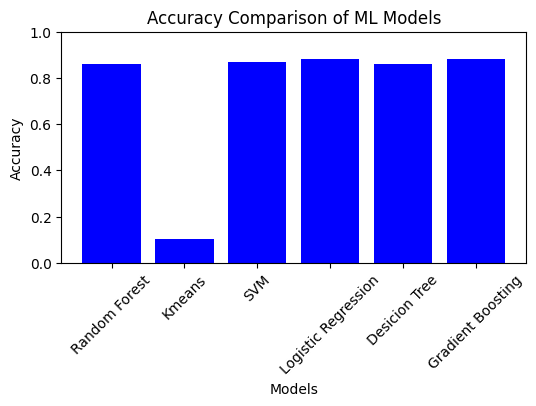

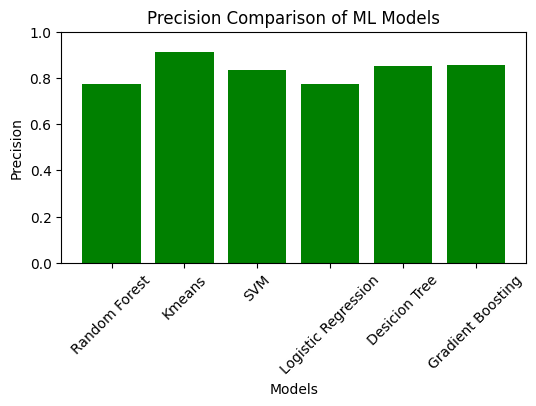

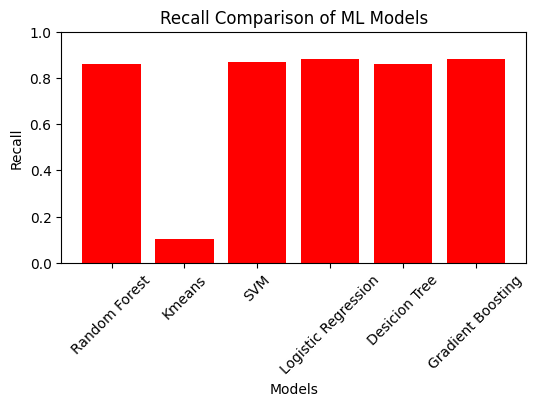

In [14]:
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Random Forest', "Kmeans", 'SVM', 'Logistic Regression', 'Desicion Tree', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_kmeans, accuracy_svm, accuracy_lr, accuracy_dt, accuracy_gb]
precisions = [precision_rf, precision_kmeans, precision_svm, precision_lr, precision_dt, precision_gb]
recalls = [recall_rf, recall_kmeans, recall_svm, recall_lr, recall_dt, recall_gb]

# Plotting accuracy
plt.figure(figsize=(6, 3))
plt.bar(models, accuracies, color='blue')
plt.title('Accuracy Comparison of ML Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

# Plotting precision
plt.figure(figsize=(6, 3))
plt.bar(models, precisions, color='green')
plt.title('Precision Comparison of ML Models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

# Plotting recall
plt.figure(figsize=(6, 3))
plt.bar(models, recalls, color='red')
plt.title('Recall Comparison of ML Models')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

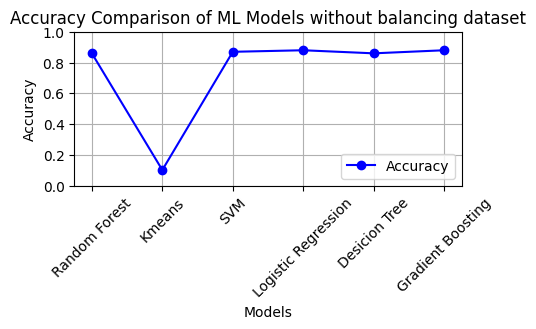

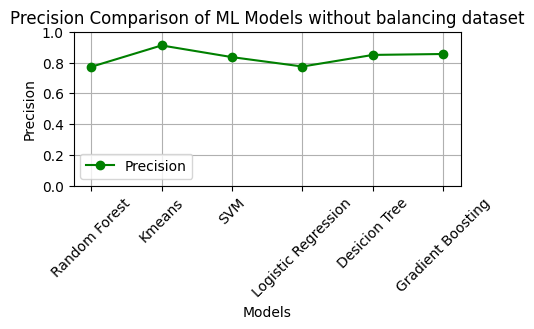

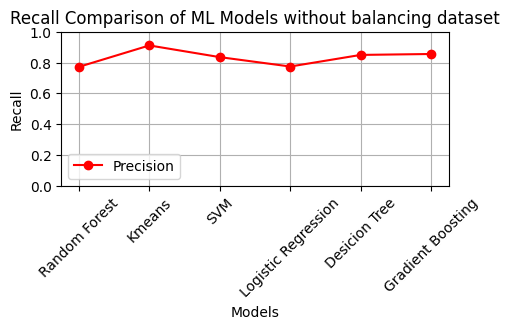

In [15]:
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Random Forest', "Kmeans", 'SVM', 'Logistic Regression', 'Desicion Tree', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_kmeans, accuracy_svm, accuracy_lr, accuracy_dt, accuracy_gb]
precisions = [precision_rf, precision_kmeans, precision_svm, precision_lr, precision_dt, precision_gb]
recalls = [recall_rf, recall_kmeans, recall_svm, recall_lr, recall_dt, recall_gb]

# Plotting accuracy
plt.figure(figsize=(5, 2))
plt.plot(models, accuracies, marker='o', color='blue', label='Accuracy')
plt.title('Accuracy Comparison of ML Models without balancing dataset')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plotting precision
plt.figure(figsize=(5, 2))
plt.plot(models, precisions, marker='o', color='green', label='Precision')
plt.title('Precision Comparison of ML Models without balancing dataset')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plotting recall
plt.figure(figsize=(5, 2))
plt.plot(models, precisions, marker='o', color='red', label='Precision')
plt.title('Recall Comparison of ML Models without balancing dataset')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()